In [2]:
# Import libraries, features and settings (not all of these are needed so pull what you need)

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import io
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import preprocessing
plt.rc("font", size = 14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
sns.set(style="white")
sns.set(style="whitegrid", color_codes = True)

In [20]:
#reading the given csv
df = pd.read_csv("historic.csv")
# To display the top 5 rows
df.head(10)

,item_no,category,main_promotion,color,stars,success_indicator
0,739157,Tunic,Catalog,Green,3.1,flop
1,591846,Hoodie,Category_Highlight,Red,1.5,flop
2,337574,Sweatshirt,Catalog,Red,4.4,top
3,401933,Polo-Shirt,Category_Highlight,Blue,3.1,flop
4,812151,Hoodie,Category_Highlight,Green,4.1,top
5,200284,Hoodie,Display_Ad_Campaign,Yellow,3.9,flop
6,974264,Sweatshirt,Catalog,Red,1.4,flop
7,389059,Sweatshirt,Category_Highlight,Red,1.8,top
8,413025,T-Shirt,Catalog,Black,3.2,top
9,615692,Hoodie,Category_Highlight,White,5.0,top


In [21]:
#converting the given data into binary format of 0 and 1
df['success_indicator'] = df['success_indicator'].apply(lambda x: 0 if x == 'flop' else 1)
df

,item_no,category,main_promotion,color,stars,success_indicator
0,739157,Tunic,Catalog,Green,3.1,0
1,591846,Hoodie,Category_Highlight,Red,1.5,0
2,337574,Sweatshirt,Catalog,Red,4.4,1
3,401933,Polo-Shirt,Category_Highlight,Blue,3.1,0
4,812151,Hoodie,Category_Highlight,Green,4.1,1
...,...,...,...,...,...,...
7995,280947,T-Shirt,Catalog,Blue,3.9,0
7996,874952,Sweatshirt,Frontpage_Header,Green,3.5,1
7997,891640,T-Shirt,Category_Highlight,Yellow,4.0,0
7998,786448,Blouse,Category_Highlight,Blue,2.6,0


In [22]:
df["category"].unique()

array(['Tunic', 'Hoodie', 'Sweatshirt', 'Polo-Shirt', 'T-Shirt', 'Blouse'],
      dtype=object)

In [23]:
from sklearn.preprocessing import LabelEncoder
le_category = LabelEncoder()
df['category'] = le_category.fit_transform(df['category'])
df['category'].unique()

array([5, 1, 3, 2, 4, 0])

In [24]:
df["main_promotion"].unique()

array(['Catalog', 'Category_Highlight', 'Display_Ad_Campaign',
       'Frontpage_Header'], dtype=object)

In [25]:
le_main_promotion = LabelEncoder()
df['main_promotion'] = le_category.fit_transform(df['main_promotion'])
df['main_promotion'].unique()

array([0, 1, 2, 3])

In [26]:
df["color"].unique()

array(['Green', 'Red', 'Blue', 'Yellow', 'Black', 'White', 'Multi-Color',
       'Brown', 'Pink', 'Orange'], dtype=object)

In [27]:
le_color = LabelEncoder()
df['color'] = le_category.fit_transform(df['color'])
df['color'].unique()

array([3, 7, 1, 9, 0, 8, 4, 2, 6, 5])

In [28]:
df

,item_no,category,main_promotion,color,stars,success_indicator
0,739157,5,0,3,3.1,0
1,591846,1,1,7,1.5,0
2,337574,3,0,7,4.4,1
3,401933,2,1,1,3.1,0
4,812151,1,1,3,4.1,1
...,...,...,...,...,...,...
7995,280947,4,0,1,3.9,0
7996,874952,3,3,3,3.5,1
7997,891640,4,1,9,4.0,0
7998,786448,0,1,1,2.6,0


In [29]:
#Dropping unnecesary columns
df = df.drop(['item_no'], axis=1)
df.head(5)

,category,main_promotion,color,stars,success_indicator
0,5,0,3,3.1,0
1,1,1,7,1.5,0
2,3,0,7,4.4,1
3,2,1,1,3.1,0
4,1,1,3,4.1,1


In [30]:
from sklearn.model_selection import train_test_split
trainingSet, testSet = train_test_split(df, test_size=0.2)

In [31]:
train_df = trainingSet
test_df = testSet


In [32]:
# Training data
X_train = train_df[['category', 'main_promotion', 'color', 'stars']]
y_train = train_df['success_indicator']

# Testing data
X_test = test_df[['category', 'main_promotion', 'color', 'stars']]
y_test = test_df['success_indicator']

In [33]:
train_df.head()

,category,main_promotion,color,stars,success_indicator
2914,5,0,3,1.8,0
4301,0,0,1,5.4,0
3909,2,0,1,2.8,1
2757,4,1,1,2.6,1
2040,3,3,0,2.9,1


In [34]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

In [35]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[344, 244],
       [ 94, 918]])

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 427.9555555555555, 'Predicted label')

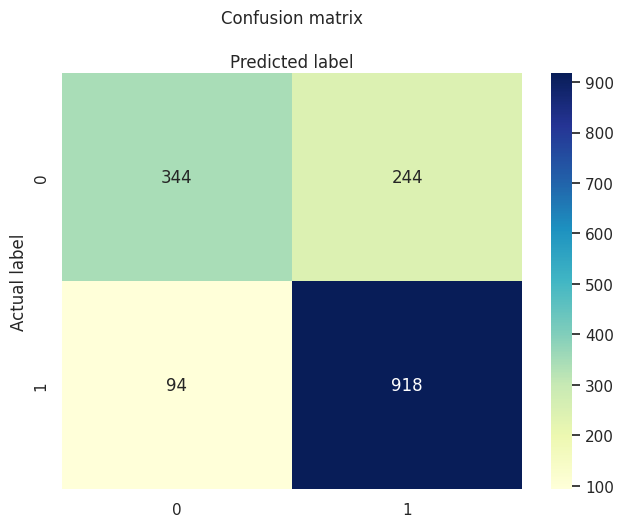

In [37]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [38]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.78875
Precision: 0.7900172117039587
Recall: 0.9071146245059288
